<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

Материал взят из репозитория [Deep Learning Shcool](https://www.dlschool.org/) и доработан мной.

---

<h2 style="text-align: center;"><b>Python. Занятие 2: Numpy, Scipy</b></h2>

<img align=left src="https://cdn.fedoramagazine.org/wp-content/uploads/2015/11/Python_logo.png" width=400 height=250/>

<img src="https://numpy.org/images/logos/numpy.svg" width=150 height=150 />

#### При подготовке ноутбука использовался сайт: http://www.inp.nsk.su/~grozin/python/

---

## Библиотека NumPy

Пакет **`NumPy`** предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab`, поскольку функции этой библиотеки реализованы на C, и мы просто вызываем из из питона.

In [2]:
# стандартное название для импорта numpy - np
import numpy as np
import math

In [2]:
# from numpy import *
# как и влюбом другом языке и библиотке, так делать нельзя. Вы очень быстро запутаетесь в функциях из numpy 
# и запутаете всех, кто читает ваш код

## Векторы и матрицы в numpy

* **Одномерные массивы**. Я предполагаю, что почти все знают про обычные массивы и про операции над ними. Они выглядят следующим образом:

In [7]:
x = [3, 4, 1]
print(x)

[3, 4, 1]


Давайте преобразуем наш массив в __numpy__ массив:

In [8]:
a = np.array(x)
print(a, type(a))

[3 4 1] <class 'numpy.ndarray'>


`print` печатает массивы в удобной форме.

In [12]:
print(2 * a * 2)

[12 16  4]


In [13]:
a, a + 1, a * 3 + 2  # broadcasting # 3x + 2

(array([3, 4, 1]), array([4, 5, 2]), array([11, 14,  5]))

* **Многомерные массивы**

In [14]:
# Простая матричка
x = [[3, 4, 1],
     [1, 2, 3]]
print(x)

[[3, 4, 1], [1, 2, 3]]


In [15]:
a = np.array(x)
print(a)

[[3 4 1]
 [1 2 3]]


In [16]:
# Реально многомерный массив
x = [
        [ [1, 2, 3], [4, 5, 6]],
        [ [7, 8, 9], [10, 11, 12]] 
    ]
print(x)

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]


In [17]:
a = np.array(x)
print(a.shape)
print(a)

(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [18]:
a + 1

array([[[ 2,  3,  4],
        [ 5,  6,  7]],

       [[ 8,  9, 10],
        [11, 12, 13]]])

Как мы видим, для numpy нет никакой разницы, сколько измерений у матрицы, все они представляются numpy.ndarray

In [19]:
a.dtype

dtype('int64')

# Типы данных в numpy

`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`).

In [20]:
a.dtype, a.dtype.name, a.itemsize

(dtype('int64'), 'int64', 8)

In [22]:
b = np.array([0.1, 2, 1])
b.dtype, b

(dtype('float64'), array([0.1, 2. , 1. ]))

Точно такой же массив.

In [23]:
c = np.array([0.1, 2, 1], dtype=np.float64)  # np.int32, np.int16, np.float32, ...
print(c)

[0.1 2.  1. ]


Преобразование данных

In [25]:
print(c.dtype)
print(c.astype(np.int16))
print(c.astype(str))

float64
[0 2 1]
['0.1' '2.0' '1.0']


Так для чего нам нужны эти массивы, почему нам может не хватать возможностей обычных массивов?

# Методы массивов в numpy
Класс `ndarray` имеет много методов.

In [ ]:
dir()

In [28]:
dir(list([1]))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [26]:
print(set(dir(a)) - set(dir(list)))

{'setfield', 'var', 'clip', 'getfield', '__array_priority__', 'partition', '__deepcopy__', 'squeeze', '__divmod__', 'cumprod', '__rshift__', 'conj', '__imod__', '__rsub__', '__setstate__', 'tobytes', 'all', 'trace', 'flags', 'size', 'mean', 'astype', '__array__', 'T', '__rmatmul__', '__neg__', '__array_ufunc__', 'take', 'repeat', '__ifloordiv__', 'nbytes', 'dump', 'sum', 'flatten', '__array_struct__', '__isub__', '__ror__', 'transpose', 'imag', 'item', 'itemset', 'itemsize', '__array_prepare__', 'put', '__invert__', 'ctypes', '__xor__', '__rtruediv__', 'byteswap', 'tofile', 'view', '__complex__', 'setflags', 'max', 'std', 'argmin', '__pow__', '__rrshift__', '__matmul__', 'prod', '__rlshift__', '__rmod__', 'strides', 'any', 'conjugate', '__radd__', 'shape', '__and__', '__floordiv__', '__float__', '__iand__', '__copy__', '__mod__', 'searchsorted', '__bool__', 'base', 'min', '__index__', '__itruediv__', 'cumsum', '__rxor__', 'compress', '__rand__', '__ilshift__', '__lshift__', 'reshape', 

## Одномерные массивы
* числовые операции и нахождение статистик

In [29]:
x = [1, 2, 0, 3, 4]
a = np.array(x)

In [30]:
# У массивов можно легко и быстро посчитать разные статистики
a.std(), a.sum(), a.prod(), a.min(), a.max(), a.mean()

(1.4142135623730951, 10, 0, 0, 4, 2.0)

In [31]:
# массивы можно умножать и складывать со скалярами и другими массивами, операции проходят поэлементно
a * 2, a / 2, a + 1, a - 1

(array([2, 4, 0, 6, 8]),
 array([0.5, 1. , 0. , 1.5, 2. ]),
 array([2, 3, 1, 4, 5]),
 array([ 0,  1, -1,  2,  3]))

In [32]:
np.array([1]) / np.array([0])

<ipython-input-32-025c907bf4fb>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.array([1]) / np.array([0])


array([inf])

In [33]:
a, a + a, a * a, a / a, a ** 2

<ipython-input-33-c919162a4ba8>:1: RuntimeWarning: invalid value encountered in true_divide
  a, a + a, a * a, a / a, a ** 2


(array([1, 2, 0, 3, 4]),
 array([2, 4, 0, 6, 8]),
 array([ 1,  4,  0,  9, 16]),
 array([ 1.,  1., nan,  1.,  1.]),
 array([ 1,  4,  0,  9, 16]))

In [34]:
# (с листами из питона так не получится, для них сложение означает конкатенацию)
print(type(x))
print(x)
print(x + x)
print(x * 2)
print(x ** 2)

<class 'list'>
[1, 2, 0, 3, 4]
[1, 2, 0, 3, 4, 1, 2, 0, 3, 4]
[1, 2, 0, 3, 4, 1, 2, 0, 3, 4]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

* Поэлементные операции

In [36]:
# В numpy есть почти функции, которых хватает для построения почти любого расчета
np.exp(a), np.sin(a), np.cos(a), np.round(a), np.log(a) # и много других, лучше просто загуглить, когда вам что-то понадобится

<ipython-input-36-47f8d08aced6>:2: RuntimeWarning: divide by zero encountered in log
  np.exp(a), np.sin(a), np.cos(a), np.round(a), np.log(a) # и много других, лучше просто загуглить, когда вам что-то понадобится


(array([ 2.71828183,  7.3890561 ,  1.        , 20.08553692, 54.59815003]),
 array([ 0.84147098,  0.90929743,  0.        ,  0.14112001, -0.7568025 ]),
 array([ 0.54030231, -0.41614684,  1.        , -0.9899925 , -0.65364362]),
 array([1, 2, 0, 3, 4]),
 array([0.        , 0.69314718,       -inf, 1.09861229, 1.38629436]))

Пример одной функции потерь в машинном обучении:

$$f(a) = \sum_{k} \log(1 + \exp(-a_k))$$

In [39]:
f_a = np.sum(np.log1p(np.exp(-a)))

In [40]:
f_a

1.2000741586126924

* сортировка/добавление/удаление элементов массива

In [41]:
b = np.arange(9, -1,-1)
print(b)
print(f'sorted b {np.sort(b)}')
print(f'original b {b}')
b.sort()
print(f'original b after inplace sort {b}')

[9 8 7 6 5 4 3 2 1 0]
sorted b [0 1 2 3 4 5 6 7 8 9]
original b [9 8 7 6 5 4 3 2 1 0]
original b after inplace sort [0 1 2 3 4 5 6 7 8 9]


Функции delete, insert и append не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.


In [42]:
a = np.arange(10, -1, -1)

a = np.delete(a, [5, 7])
print(a)

[10  9  8  7  6  4  2  1  0]


In [43]:
a = np.insert(a, [2, 3], [100, 200])
print(a)

[ 10   9 100   8 200   7   6   4   2   1   0]


In [44]:
a = np.append(a, [1, 2, 3])
print(a)

[ 10   9 100   8 200   7   6   4   2   1   0   1   2   3]


Еще одна группа полезных операций: кумулятивные суммы и произведения

In [45]:
a = np.array([2, 2, 2, 2, 0, 1, 1])

# кумулятивная (накопительная) сумма - сумма всех элементов массива от нулевого до текущего
np.cumsum(a)  #  b_j = a_1 + a_2 + ... + a_j

array([ 2,  4,  6,  8,  8,  9, 10])

In [46]:
# кумулятивное произведение
np.cumprod(a)

array([ 2,  4,  8, 16,  0,  0,  0])

In [47]:
x = np.arange(1, 10 ** 5)

In [49]:
ns = [1, 10, 100, 1000, 5000]

In [ ]:
for n in ns:
    stat = 1 / n * np.sum(x[:n])#calculate_stat(x, n) 
    # check_stat(stat)
    
stats = np.cumsum(x) / np.arange(1, len(x) + 1)
# stats[i] = mean over x_1, .... x_i
stats[ns]

## Многомерные массивы

В случае многомерных массивов работает все, что мы только что попробовали для одномерных, но появляются и новые возможности.

* работа с shape массива

У многомерны массивов есть понятие осей (их еще можно назвать измерениями). Так как одни и те же данные могут храниться в массивах разной формы, в numpy есть методы, чтобы эту форму менять

`ndarray.shape` — размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). 

В $n$-мерном случае возвращается кортеж размеров по каждой координате.

In [54]:
x = [[1, 2, 3],
     [4, 5, 6]]

a = np.array(x)
print(a)
print('shape:', a.shape, '\nndim:', a.ndim, '\nsize:', a.size, '\nlen():', len(a))

[[1 2 3]
 [4 5 6]]
shape: (2, 3) 
ndim: 2 
size: 6 
len(): 2


In [ ]:
# shape
# ndim = len(shape)
# size = np.prod(shape)
# len() = shape[0]

**Вопрос:** 
 >Как связаны элементы кортежа shape, ndim, size?

**Ответ:**

**Вопрос:**
>Каковы значения shape, ndim, size, len для картинки RGB 160x100? 

>А для массива из 1000 таких картинок?

In [55]:
# 1000 x 160 x 100 x 3
# shape = (1000, 160, 100, 3); array[0] - first picture, array[0].shape = (160, 100, 3)
# ndim = 4
# size = 1000 * 160 * 100 * 3
# len() = 1000
# i want: array.shape = [1000; 160 * 100 * 3]
# array.reshape(len(array), -1)
# -----------------------------------------------


# array.reshape(-1, 100)

**Ответ:**

Для смены shape есть методы reshape, flatten, ravel

In [61]:
x = [[1, 2, 3],
     [4, 5, 6]]
a = np.array(x)
print(a)

# reshape
print(a.reshape(3, 2))
# вместо одной из осей можно просто вставить -1, тогда numpy попытается сам понять, какое там должно быть число
print(a.reshape(-1, 3))
# если такое число не получится найти, то будет ошибка
print(a.reshape(-1))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [69]:
# flatten и ravel очень похожи, они вытягивают матрицу любой размерности в строчку
# Единственно отличие в том, что flatten возвращает копию массива, вытянутую в строчку
# а ravel - просто view(т.е. не происходит реального копирования значений)
# Пример снизу показывает это отличие
flattened = a.flatten()
flattened[0] = 1000
print(flattened)
print(a)
raveled = a.ravel()
raveled[0] = 1000
print(a)

[1000    2    3    4    5    6]
[[1 2 3]
 [4 5 6]]
[[1000    2    3]
 [   4    5    6]]


In [70]:
raveled

array([1000,    2,    3,    4,    5,    6])

* Подсчет статистик по осям

In [62]:
print(a)

[[1 2 3]
 [4 5 6]]


In [65]:
a = np.random.rand(2, 3)

In [72]:
a

array([[0.65685766, 0.37335358, 0.60157657],
       [0.07227068, 0.56007624, 0.41675173]])

In [73]:
a.std(), a.sum(), a.prod(), 

(0.19471389386164797, 2.6808864683494327, 0.0024886808502153006)

In [74]:
a.shape

(2, 3)

In [75]:
# Если не написать axis, то статистика посчиатется по всем массиву
# Если axis=1, то для трехмерной матрицы суммирование (например) будет идти по элементам с индексами (i, *, j)
# Если axis=(1, 2), то для трехмерной матрицы суммирование (например) будет идти по элементам с индексами (i, *, *)
a.std(axis=0), a.sum(axis=0), a.prod(axis=0), a.min(axis=0), a.max(axis=0), a.mean(axis=0)

(array([0.29229349, 0.09336133, 0.09241242]),
 array([0.72912834, 0.93342982, 1.01832831]),
 array([0.04747155, 0.20910647, 0.25070808]),
 array([0.07227068, 0.37335358, 0.41675173]),
 array([0.65685766, 0.56007624, 0.60157657]),
 array([0.36456417, 0.46671491, 0.50916415]))

In [70]:
# Посчитаем, итерируясь по 1 оси
a.std(axis=1), a.sum(axis=1), a.prod(axis=1), a.min(axis=1), a.max(axis=1), a.mean(axis=1)

(array([0.12270846, 0.2047121 ]),
 array([1.63178781, 1.04909865]),
 array([0.14753073, 0.0168689 ]),
 array([0.37335358, 0.07227068]),
 array([0.65685766, 0.56007624]),
 array([0.54392927, 0.34969955]))

## Булевы массивы
Булевы массивы не настолько особенны, чтобы выделять их в отдельную категорию, но у них есть несколько интересных свойств, которые нам помогут. Булевы массивы естественно возникают в нашей программе при сравнении каких-то двух массивов в numpy (==,>,>=,<,<=).

In [80]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 0])

a == b, a > b, a >= b, a < b, a <= b

(array([ True,  True, False]),
 array([False, False,  True]),
 array([ True,  True,  True]),
 array([False, False, False]),
 array([ True,  True, False]))

Посмотрим, что мы можем делать с такими массивами

In [77]:
a = np.array([True, False, True])
b = np.array([1, 2, 3])

In [83]:
b[b > 2 | b < 1.5]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
a = np.array([True, False, True])
b = np.array([False, False, True])

# Логические поэлементные операции
print(f'a and b {a & b}')
print(f'a or b {a | b}')
print(f'not a {~a}')
print(f'a xor b {a ^ b}')

a and b [False False  True]
a or b [ True False  True]
not a [False  True False]
a xor b [ True False False]


In [84]:
# a = [True, True , False]
if a.any(): 
    pass

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [85]:
# Логические операции над всеми элементами массива, в них тоже можно использовать параметр axis
a, a.any(), a.all()

(array([ True, False,  True]), True, False)

In [86]:
# Если к булевому массиву применить функции, предназначенные только для чисел, 
# то перед применением все True сконвертируются в 1, а False в 0
# Здесь также можно добавить параметр axis
a.mean(), a.max(), a.sum(), a.std()

(0.6666666666666666, True, 2, 0.4714045207910317)

**Задание на булевы массивы:**
> Пусть у нас есть два одномерных массива y_pred - предсказанный нашей моделью класс, и y_true - настоящий класс. Посчитайте accuracy нашего классификатора на этих данных (долю случаев, в которых реальный класс совпал с предсказанием)

In [88]:
import numpy as np

y_pred = np.array([1, 2, 1, 2, 1, 1])
y_true = np.array([1, 2, 1, 1, 1, 1])

sum(y_pred==y_true)/len(y_pred), 5/6

(0.8333333333333334, 0.8333333333333334)

# Полезные функции из numpy

Также в numpy есть много полезных методов для получения готовых массивов какого-то вида

* Функция **arange** подобна range. Аргументы могут быть с плавающей точкой. Следует избегать ситуаций, когда (конец−начало)/шаг - целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. Лучше, чтобы конец диапазона был где-то посредине шага.

In [88]:
# поиграемся с питоновским методом range
print(list(range(8)))
# print(*range(0, 8))
# print(*[2,5])
# print(2,5)

[0, 1, 2, 3, 4, 5, 6, 7]


In [89]:
# в нем нельзя использовать не целый шаг
print(*range(0, 8, 0.5))

TypeError: 'float' object cannot be interpreted as an integer

In [90]:
# перейдем к arange
# здесь не целый шаг использовать уже можно
print(type(np.arange(0, 8)))
print(np.arange(0, -8, -0.5))

<class 'numpy.ndarray'>
[ 0.  -0.5 -1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5.  -5.5 -6.  -6.5
 -7.  -7.5]


In [54]:
print(np.arange(0, 8, 0.5))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5]


Но самое главное:

In [92]:
%time np.arange(0, 50000000)
%time np.array(list(range(0, 50000000)))
%time a = range(0, 50000000)


CPU times: user 93.2 ms, sys: 105 ms, total: 198 ms
Wall time: 202 ms
CPU times: user 4.87 s, sys: 987 ms, total: 5.86 s
Wall time: 5.94 s
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 8.11 µs


In [48]:
type(a)

range

**Вопрос на знание питона**: почему просто range занял 7 мкс, даже меньше, чем numpy?

* Еще один метод, похожий на arange это **linspace**. С его помощью можно создавать последовательности чисел с постоянным шагом. Начало и конец диапазона включаются; последний аргумент - число точек.

In [89]:
%time a = np.linspace(0, 1, 8)
%time print(a)

CPU times: user 134 µs, sys: 9 µs, total: 143 µs
Wall time: 140 µs
[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
CPU times: user 279 µs, sys: 5 µs, total: 284 µs
Wall time: 288 µs


* **Быстродействие**. Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` - быстродействие. Всегда, когда это возможно, лучше использовать операции, определенные в numpy.

In [98]:
a = np.linspace(0, 8, 50000000)

In [99]:
%%time 
res = a + a

CPU times: user 151 ms, sys: 149 ms, total: 300 ms
Wall time: 308 ms


In [100]:
%%time
res = []
for value in a:
    res.append(value + value)

CPU times: user 12.8 s, sys: 1.25 s, total: 14.1 s
Wall time: 14.6 s


(в совсем простых операциях, таких как сложение двух чисел, питон не уступает в скорости C++ или C, а поэтому использование numpy не дает ввыигрыша, но в более тяжелых вычислениях разница становится колоссальнной)

* Еще один способ создавать стандартные массивы - __`numpy.eye(N, M=None, ...)`__, __`numpy.zeros(shape, ...)`__, __`numpy.ones(shape, ...)`__.

Первая функция создает единичную матрицу размера $N \times M$; если $M$ не задан, то $M = N$. 

Вторая и третья функции создают матрицы, состоящие целиком из нулей или единиц соответственно. В качестве первого аргумента необходимо задать размерность массива — кортеж целых чисел. В двумерном случае это набор из двух чисел: количество строк и столбцов матрицы.

__Примеры:__

In [91]:
b = np.eye(5, 4)
print("Единичная матрица:\n", b)

Единичная матрица:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


In [92]:
c = np.ones((7, 5))
print("Матрица, состоящая из одних единиц:\n", c)

Матрица, состоящая из одних единиц:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [94]:
np.zeros((2, 2, 3, 1))

array([[[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]]])

__Обратите внимание: размерность массива задается не двумя аргументами функции, а одним — кортежем!__ 

Вот так —  __`np.ones(7, 5)`__ — создать массив не получится, так как функции в качестве параметра `shape` передается `7`, а не кортеж `(7, 5)`.

**Задание на создание матриц:**
> Создайте матрицу размера 4х5, у которой все элементы стоящие на диагонали равны -1, а все остальные равны 0.5

In [95]:
np.diag([-1.5 , -1.5 , -1.5], 0) + 0.5

array([[-1. ,  0.5,  0.5],
       [ 0.5, -1. ,  0.5],
       [ 0.5,  0.5, -1. ]])

In [106]:
a = np.ones((4, 5))
a *= 0.5
a[np.arange(len(a)), np.arange(len(a))] = -1

# np.array(0, 1, 2, 3)
# np.array(0, 1, 2, 3)
# -> a[0, 0], a[1, 1], a[2, 2], a[3, 3]

In [107]:
a

array([[-1. ,  0.5,  0.5,  0.5,  0.5],
       [ 0.5, -1. ,  0.5,  0.5,  0.5],
       [ 0.5,  0.5, -1. ,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, -1. ,  0.5]])

# Slices, Fancy Indexing and stuff

* Обращение по слайсам

Так же как и для обычных листов, для numpy массивов доступно обращение по слайсам (a[2:5:2], 2:5:2 - слайс). Но есть одно отличие. В numpy можно писать несколько слайсов через запятую, чтобы сделать _срез_ сразу по нескольким осям - a[2:5, 1:4]. 

In [108]:
a = np.array([
                [1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]
             ])
print(a)
print(a[0:2, 1:3])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


* Обращение по слайсам с добавлением новых осей. 

В NumPy к размерностям объектов можно добавлять фиктивные оси с помощью np.newaxis. Для того, чтобы понять, как это сделать, рассмотрим пример:

In [112]:
a = np.arange(1, 4, 1)
print(a, a.shape)
print('Вектор a с newaxis --> вектор-строка:\n', a[None, :], a[None, :].shape)
print('Полученная размерность:', a[:, np.newaxis].shape)

# x - [b, c, h, w]
# mask - [b, h, w]

# for color_val in x[0; :, 1, 1]:

#  result = x * mask[:, None, :, :] --: [b, h, w] -> [b, 1, h, w] and broadcast

[1 2 3] (3,)
Вектор a с newaxis --> вектор-строка:
 [[1 2 3]] (1, 3)
Полученная размерность: (3, 1)


* Обращение по индексам

в numpy можно обращаться сразу к нескольким элементам массива, которые не идут подряд, передав в качестве аргумента list или numpy array индексов

In [113]:
a = np.array([0, 1, 2, 3])
a[0], a[[0, 1, 1, 2]], a[np.array([0, 1, 1, 2])]

(0, array([0, 1, 1, 2]), array([0, 1, 1, 2]))

In [114]:
# многомерный случай
z = np.array([[1,2], [3,4]])
print(z)
# можно передать лист с индексами для каждого из измерений. 
# В данном случае выберутся элементы с индексами (0, 0) и (1, 1). Результат - одномерный массив
print(z[[0,1], [0,1]])

[[1 2]
 [3 4]]
[1 4]


* Обращение по булевому массиву

In [116]:
print(a)
print(a > 1)
#print(a[[True, False, True, True]])
# Как мы уже выяснили, в результате сравнения numpy массивов получается булев массив, 
# его очень удобно использовать, чтобы обращаться к элементам, удовлетворяющим какому-то условию
print(a[a > 1])

[0 1 2 3]
[False False  True  True]
[2 3]


* Присвоение значений во view

Когда мы используем слайсы для выборки каких-то элементов массива, нам возвращается не новый массив с этими элементами, а просто объект view, который ссылается на какие-то ячейки в реальном массиве. Поэтому мы можем сделать так:

In [117]:
a = np.array([1, 2, 3])
b = a[0:2]
print(b)
b[0] = 100
print(b)
print(a)

[1 2]
[100   2]
[100   2   3]


Изменив элемент во view b, мы поменяли элемент и в массиве а. Если же обратиться по списку координат или булевому массиву, так не получится

In [118]:
a = np.array([1, 2, 3])
b = a[[0, 1]]
print(b)
b[0] = 100
print(b)
print(a)

[1 2]
[100   2]
[1 2 3]


In [119]:
a = np.array([1, 2, 3])
b = a[[True, True, False]]
print(b)
b[0] = 100
print(b)
print(a)

[1 2]
[100   2]
[1 2 3]


Означает ли это, что не сработают выражения вида:
> a[[0, 1]] = 100

> a[[True, True, False]] = 100

Присваивания сработают, потому что в данном случае копия массива создаваться не будет, вместо этого вызовется магический метод питона \_\_setitem\_\_. Очень удобная особенность питона, про которую не стоит забывать.

In [67]:
a = np.array([1, 2, 3])
a[[True, True, False]] = 100
print(a)

[100 100   3]


Если же слева будет не просто обращение по индексу, а двойное обращение по индексу, то питону придется вычислить значение 
> a[[True, True, False]]

тем самым создав копию, и только потом взять у него нулевой элемент. Поэтому 0 присвоится в массив-копию, который тут же уничтожится.

In [68]:
a = np.array([1, 2, 3])
a[[True, True, False]][0] = 100
print(a)

[1 2 3]


# Линейная Алгебра

До этого мы рассматривали разные операции numpy, которые не связаны напрямую с линейной алгеброй. Пришло время это изменить)

* Скалярное произведение 
$a~\cdot~b = (a_1, a_2, .., a_n) \cdot (b_1, b_2, .., b_n) = a_1b_1 + a_2b_2 + .. + b_nb_n = \sum_{i=1}^{n} a_ib_i$:


In [128]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
print(a,b)

[1 2 3] [2 3 4]


In [129]:
a @ b

20

In [131]:
print(np.matmul(a, b))

20


### Векторы и матрицы

In [120]:
b = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

Наш 2-мерный массив __b__, также его можно назвать матрицей, имеет 2 строки и 3 столбца.
То есть наша матрица состоит из 2 вектор-строк:

In [121]:
print(b)
b[0:2,0:1]

[[1 2 3]
 [4 5 6]]


array([[1],
       [4]])

In [122]:
b[1:2]

array([[4, 5, 6]])

Обычно в линейной алгебре под любым вектором подразумевается вектор-столбец. Наша матрица содержит 3 вектор-стобца:

In [123]:
b[:, 0:1]

array([[1],
       [4]])

In [124]:
b[:, 1:2]

array([[2],
       [5]])

In [125]:
b[:, 2:3]

array([[3],
       [6]])

In [126]:
a = np.array([
    [1, 2],
    [4, 5],
    [4, 5]
])
print(a.shape, b.shape)
a @ b

(3, 2) (2, 3)


array([[ 9, 12, 15],
       [24, 33, 42],
       [24, 33, 42]])

## Операции с матрицами

In [127]:
A = np.array([[1, 0], [0, 1]])
B = np.array([[4, 1], [2, 2]])

__Напоминание теории.__ __Транспонированной матрицей__ $A^{T}$ называется матрица, полученная из исходной матрицы $A$ заменой строк на столбцы. Формально: элементы матрицы $A^{T}$ определяются как $a^{T}_{ij} = a_{ji}$, где $a^{T}_{ij}$ — элемент матрицы $A^{T}$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` транспонированная матрица вычисляется с помощью функции __`numpy.transpose()`__ или с помощью _метода_ __`array.T`__, где __`array`__ — нужный двумерный массив.

In [128]:
a = np.array([[1, 2], [3, 4]])
b = np.transpose(a)
c = a.T

In [129]:
print("Матрица:\n", a)
print("Транспонирование функцией:\n", b)
print("Транспонирование методом:\n",  c)

Матрица:
 [[1 2]
 [3 4]]
Транспонирование функцией:
 [[1 3]
 [2 4]]
Транспонирование методом:
 [[1 3]
 [2 4]]


In [130]:
a @ b

array([[ 5, 11],
       [11, 25]])

__Напоминание теории.__ Операция __умножения__ определена для двух матриц, таких что число столбцов первой равно числу строк второй. 

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$. __Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что $c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$, где $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` произведение матриц вычисляется с помощью функции __`numpy.dot(a, b, ...)`__ или с помощью _метода_ __`array1.dot(array2)`__, где __`array1`__ и __`array2`__ — перемножаемые матрицы.

In [131]:
y = np.array([1, 0])
z = A @ y

#### Линейная алгебра (модуль `np.linalg`)

In [84]:
A = np.array([[1, 0], [1, 1]])
x = np.array([[4, 1], [2, 2]])
b = A @ x
print(b)

[[4 1]
 [6 3]]


* Решение линейной системы __$Ax=b$__:

In [85]:
x = np.linalg.solve(A, b)
print(x)

[[4. 1.]
 [2. 2.]]


### Библиотека SciPy

* Оптимизация функции (нахождение минимума/максимума):

In [133]:
from scipy.optimize import minimize

Обязательно посмотрите документацию, сходу не очевидно, как именно использовать:

In [134]:
?minimize

Опмтимизируем (минимизируем) простую функцию:

In [135]:
def f(x):
    return x ** 2

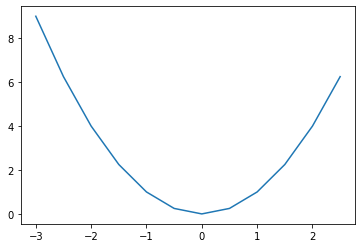

In [136]:
# %matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-3, 3, .5)
y = f(x)

plt.plot(x,y)
# plt.show()

In [137]:
res = minimize(f, x0=100)

In [138]:
res

      fun: 5.552074997367714e-17
 hess_inv: array([[0.50000004]])
      jac: array([-1.28826571e-12])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-7.45122473e-09])

Тут нужно смотреть на 4 строчки: `fun, message, success и x`  
`fun` - значние функции в точке минимума  
`message` - служебное сообщение об окончании процесса (может быть "успешно", как здесь, или сообщение о том, что что-то пошло не так ("не сошлось"))  
`success` - True, если успешно сошлось (но лучше всегда всё же смотреть и `message`)  
`x` - точка, в которой достигается минимум

Можно в аргумент `method` подавать разные ключевые слова для смены метода оптимизации, подробнее о них лучше читать документацию или погуглить.

* Интегрирование:

In [92]:
from scipy.integrate import quad, odeint
from scipy.special import erf

In [93]:
def f(x):
    return np.exp(-x ** 2)

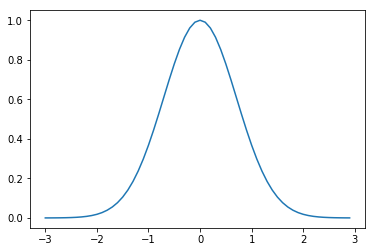

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-3, 3, .1)
y = f(x)

plt.plot(x, y)
plt.show()

Адаптивное численное интегрирование (может быть до бесконечности). `err` - оценка ошибки.

In [95]:
res, err = quad(f, 0, np.inf)
print(np.sqrt(np.pi) / 2, res, err)

0.8862269254527579 0.8862269254527579 7.101318390472462e-09


In [96]:
res, err = quad(f, 0, 1)
print(np.sqrt(np.pi) / 2 * erf(1), res, err)

0.7468241328124269 0.7468241328124271 8.291413475940725e-15


## Список материалов для самостоятельного изучения

*Статья на Хабре по основам NumPy - https://habr.com/post/121031/*  

*100 задач по NumPy для любителей посидеть вечерком за чашечкой программирования* - https://pythonworld.ru/numpy/100-exercises.html  

*Очень крутой, продвинутый ноутбук по NumPy* - https://nbviewer.jupyter.org/github/vlad17/np-learn/blob/master/presentation.ipynb

*Штука, которая вам в будущем может пригодиться ;)* - https://stackoverflow.com/questions/27948363/numpy-broadcast-to-perform-euclidean-distance-vectorized/35814006  

*Лекции по SciPy и NumPy* - http://www.scipy-lectures.org/index.html